In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Telco_Customer_Churn.csv")


In [3]:
# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
for elem in df.columns[0:]:
    print(df[elem].value_counts())
    print("\n")

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

In [10]:
#preprocessing the TotalCharges, changing the null values with zero

df.loc[ df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Also the SeniorCitizen Column contains int64 datatype which is nothing but 0(not Senior Citizen) and 1(is Senior Citizen).
# It would be easier to understand if the datatype would be object(Yes/No).
# Let's create a functions which changes the one's and zero's to yes and no.

def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [13]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


C:\Users\KINJAL RAVAL\AppData\Local\Temp\ipykernel_30504\1571535617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["Churn"],palette="Blues")


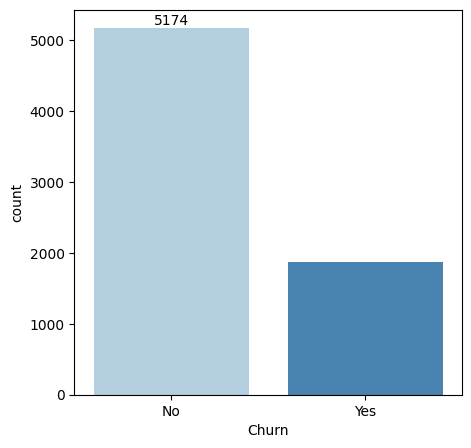

In [19]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

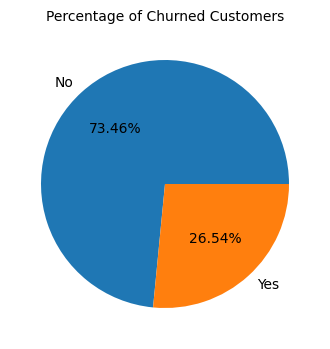

In [20]:
 # Creating pie chart of churned customers
plt.figure(figsize=(4,5))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

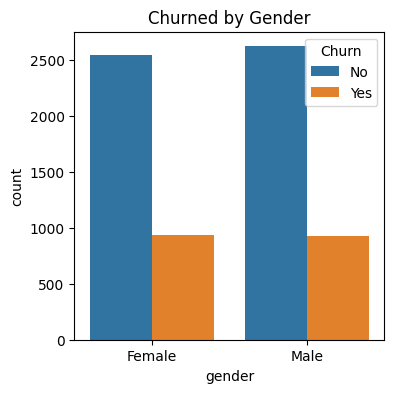

In [21]:
# Countplot of churned customers based on gender.
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = 'Churn')
plt.title("Churned by Gender")
plt.show()

The distribution of churned vs. non-churned customers is nearly identical for both genders.

Female Customers: Slightly over 2,500 stayed, while around 900–1,000 churned.
Male Customers: A similar trend is observed, with churn and retention rates almost equal to female

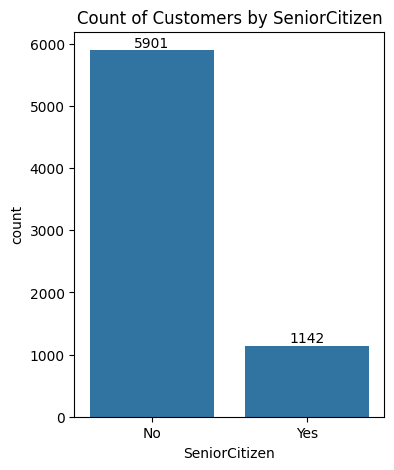

In [23]:
# Countplot of churned customers based on SeniorCitizen.
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

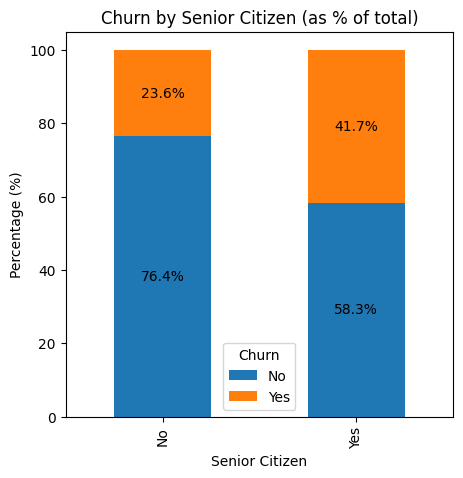

In [24]:
# Calculate the percentage of Churn within each SeniorCitizen group
pivot_df = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value = 0)
pivot_df_percent = pivot_df.divide(pivot_df.sum(axis = 1), axis = 0) * 100

# Create the stacked bar chart
ax = pivot_df_percent.plot(kind = 'bar', stacked = True, figsize = (5,5))

# Add labels on the bars to show percentage
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Annotate with percentage
    ax.annotate(f'{height:.1f}%', (x, y), ha = 'center', va = 'center')

plt.title("Churn by Senior Citizen (as % of total)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.show()

The churn rate varies significantly based on seniority:

Non-Senior Customers:
76.4% stayed, while 23.6% churned.
Senior Citizens:
Only 58.3% remained, while a much higher 41.7% churned.

## Churn Rate Vs Customer Tenure

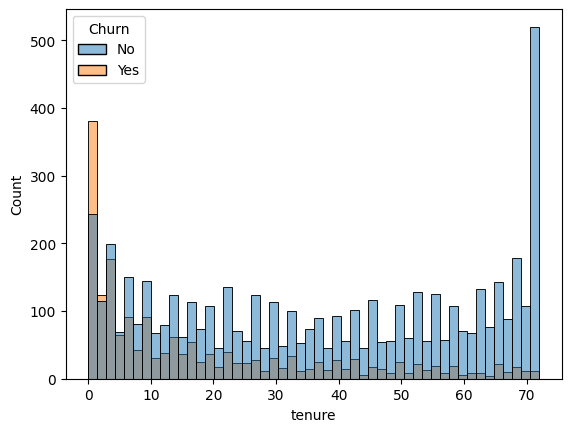

In [26]:
sns.histplot(x = "tenure", data = df, bins = 50, hue = 'Churn')
plt.show()

The relationship between customer tenure (length of time with the company) and churn shows some clear patterns:

High Churn Among New Customers:

A large number of customers churn within the first few months, indicating early dissatisfaction or lack of engagement. Lower Churn for Long-Term Customers:
Customers with longer tenures (above 20 months) tend to stay, with fewer churn cases. Spike at 70+ Months:
There is a sharp increase in customer count at the 70-month mark, likely due to long-term contract completions.

## Churn Rate by Contract Type

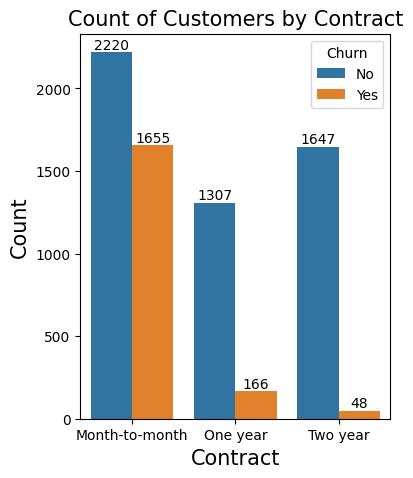

In [28]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = 'Contract', data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract",fontsize= 15)
plt.xlabel("Contract",fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.show()

The type of contract significantly impacts customer churn rates:

Month-to-Month Contracts:

Highest churn rate, with 1,655 churned customers.
More than 40% of these customers leave, indicating flexibility might lead to frequent churn.
One-Year Contracts:

Much lower churn, with only 166 customers leaving.
Customers in longer-term commitments tend to stay.
Two-Year Contracts:

Lowest churn rate, with just 48 customers leaving.
Most stable customer base, suggesting long-term contracts encourage retention.

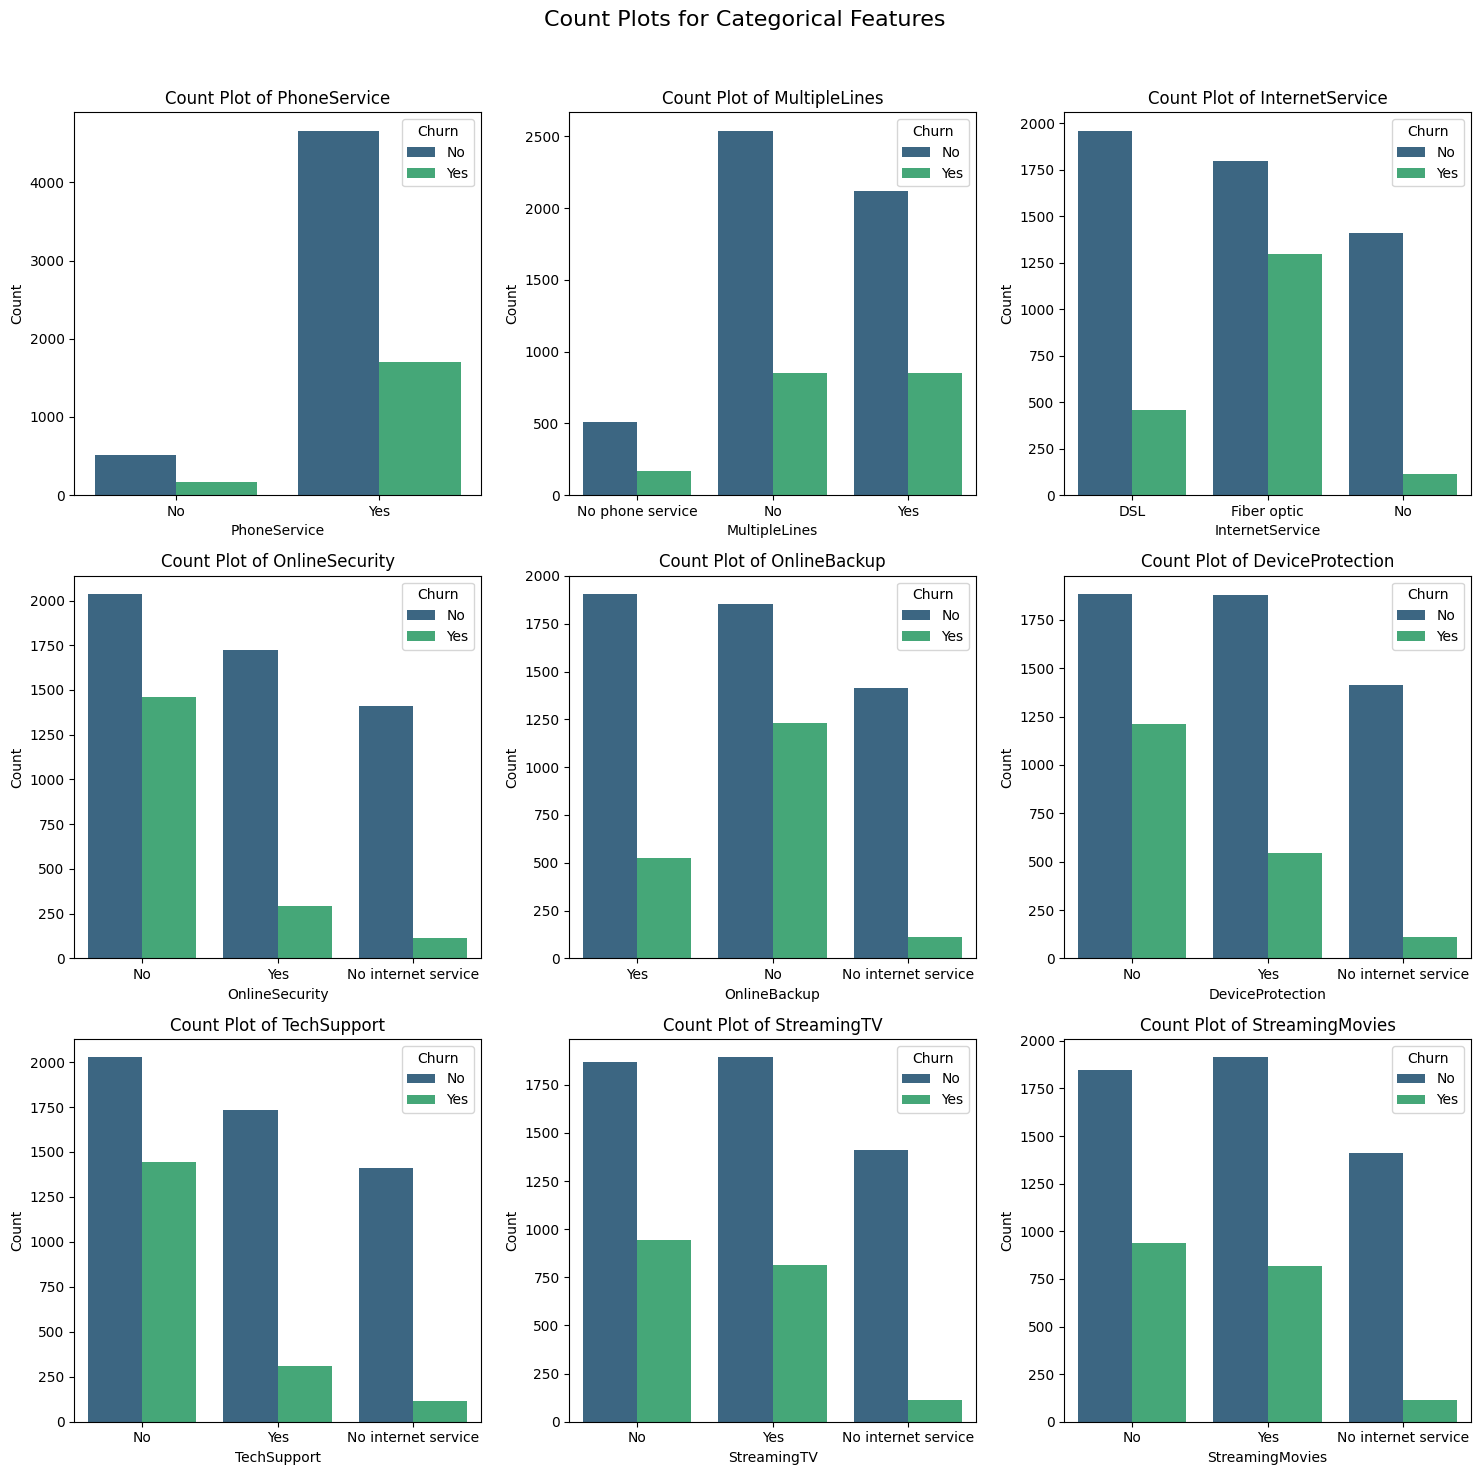

In [29]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 rows, 3 columns
fig.suptitle('Count Plots for Categorical Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a count plot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette='viridis',hue = df['Churn'])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect to make space for the suptitle
plt.show()

The charts reveal the relationship between different services and customer churn.

Phone Service & Multiple Lines

Most customers have Phone Service, but churn is higher among those with it.
Having Multiple Lines does not significantly impact churn.

Internet Service

Fiber Optic users churn more compared to DSL users.

Customers without Internet Service churn the least, suggesting bundled services may impact retention.

Online Security, Backup & Device Protection

Customers with Online Security, Backup, and Device Protection churn less than those without.

Lack of these services correlates with higher churn, suggesting security features might be a retention factor.
Tech Support

Customers without Tech Support churn more, indicating that better support services may improve retention.
Streaming Services (TV & Movies)

Having Streaming Services does not significantly impact churn, meaning entertainment services might not be a key churn driver.

In [30]:
## **Churned of Customers by Payment Method**


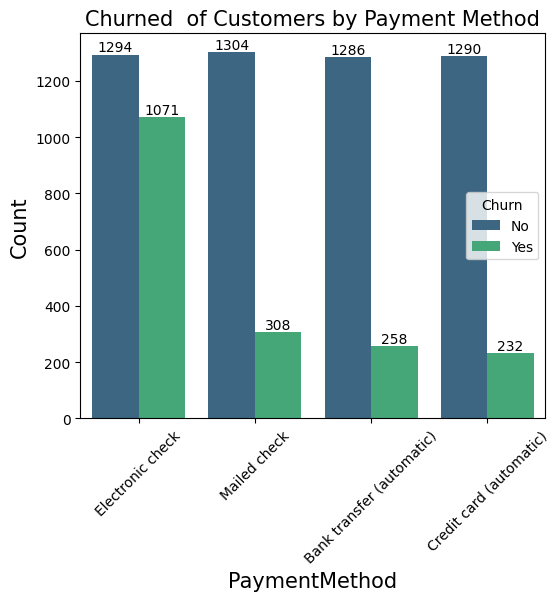

In [31]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = 'PaymentMethod', data = df,hue = "Churn",palette='viridis')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned  of Customers by Payment Method",fontsize=15)
plt.xticks(rotation = 45)
plt.xlabel("PaymentMethod",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

This chart shows the churn distribution across different payment methods.

Highest Churn: Electronic Check

Electronic Check has the highest churn rate (1071 churned customers).
This suggests that customers using electronic checks may face payment difficulties, or they prefer flexibility and are more likely to switch. Lower Churn in Automatic Payments
Automatic payments (Bank Transfer & Credit Card) have the lowest churn rates (only 258 and 232 churned customers, respectively).
This indicates that customers who set up automatic payments tend to stay longer, possibly due to convenience and commitment. Mailed Checks Have Moderate Churn
Mailed Checks show moderate churn (308 customers).
This suggests that customers using traditional payment methods are relatively stable but still more prone to churn than automatic payment users.

### Overall Conclusion of Telco Churn Customers Analysis 
The Telco Churn Analysis provides key insights into customer behavior, highlighting significant factors influencing churn.

**Tenure Impact:**

Customers with shorter tenures (0–10 months) have the highest churn rates, indicating that early-stage retention is a major challenge. Long-term customers (above 60 months) are less likely to churn.

**Contract Type:**

Month-to-month contract users have the highest churn rate, as they have more flexibility to leave. One-year and two-year contract customers show significantly lower churn, suggesting that long-term contracts increase retention.

**Internet Service & Add-ons:**

Customers using Fiber optic internet have higher churn rates compared to DSL users. Lack of online security, backup, and tech support services is associated with higher churn. Offering bundled services could improve retention.

**Payment Methods:**

Customers using Electronic Check have the highest churn rate, indicating possible dissatisfaction with this method. Automatic payment methods like bank transfers and credit cards are linked with lower churn, suggesting a preference for convenience.